In [1]:
%pylab inline
from scipy.linalg import hadamard

Populating the interactive namespace from numpy and matplotlib


In [2]:
def normalise(*qubits):
    """Create superposition state with equal amplitudes"""
    result = np.zeros(qubits[0].shape)
    for qubit in qubits:
        result += qubit/np.linalg.norm(qubits)
    return result

# Create the qubits 
zero = np.array([[1.0],[0.0]])
one = np.array([[0.0],[1.0]])

normalise(zero, one)

array([[0.70710678],
       [0.70710678]])

In [3]:
def computational_basis(n):
    return np.hsplit(np.eye(n),n)


In [4]:
def H(qubit):
    """Returns qubit passed through H"""
    
    h = 1./np.sqrt(qubit.shape[0]) * hadamard(qubit.shape[0])
    return np.dot(h, qubit)

H(one)

array([[ 0.70710678],
       [-0.70710678]])

In [5]:
def kron_prod(*qubits):
    #Calculate a Kronecker product over a variable number of inputs
    result = np.array([[1.0]])
    for qubit in qubits:
        result = np.kron(result, qubit)
    return result

kron_prod(zero, one)

array([[0.],
       [1.],
       [0.],
       [0.]])

In [6]:

def cnot(qubit):
    X = np.eye(qubit.shape[0])[::-1]
    return np.dot(X, qubit)

print(zero)
cnot(zero)


[[1.]
 [0.]]


array([[0.],
       [1.]])

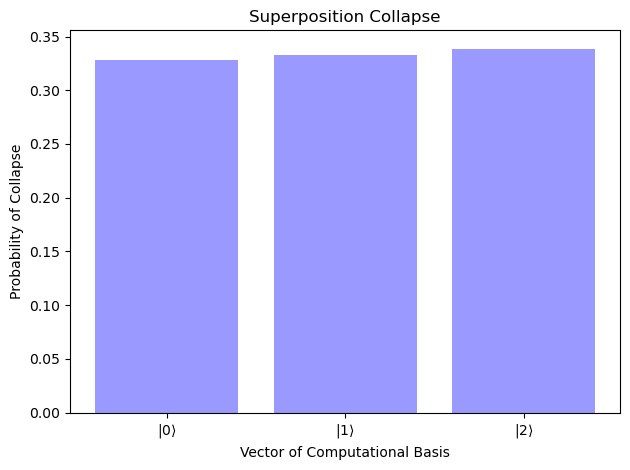

In [7]:
def measure(state):
    ps = []
    cb = computational_basis(state.shape[0])
    for i in range(state.shape[0]):
        ps.append(np.dot(cb[i],cb[i].T))
    
    identity = np.eye(state.shape[0])
    
    rho = np.dot(state, state.T)
    
    result = 0
    r = np.random.uniform(0, sum(np.diag(rho)))
    for p in np.diag(rho):
        r -= p
        if r <= 0:
            break
        result += 1
    
    result_state = normalise(np.dot(np.dot(ps[result], identity), state))
    
    
    return result, result_state

zero = np.array([[1.0],[0.0],[0.0]])
one = np.array([[0.0],[1.0],[0.0]])
two = np.array([[0.0],[0.0],[1.0]])

results = [0 for s in range(zero.shape[0])]
for i in range(10000):
    result, state = measure(normalise(one, zero, two))
    results[result-1] += 1
results /= sum(results)

fig, ax = plt.subplots()

index = np.arange(state.shape[0])
bar_width,opacity = 0.8, 0.4

rects = ax.bar(index, results, bar_width,
                alpha=opacity, color='b')

ax.set_xlabel('Vector of Computational Basis')
ax.set_ylabel('Probability of Collapse')
ax.set_title('Superposition Collapse')
ax.set_xticks(index)
ax.set_xticklabels([r'$\left|{'+str(v)+r'}\right\rangle$' for v in range(state.shape[0])])

fig.tight_layout()
plt.show()

In [8]:
def f(i, j):
    if i is j:
        return 1
    return 0

def oracle(i, j):
    return ((-1)**f(i,j))*i*j

zero = np.array([[1.0],[0.0]])
one = np.array([[0.0],[1.0]])

print("O(0,0) =",np.round(sum(oracle(H(zero), H(zero)))))
print("O(0,1) =",np.round(sum(oracle(H(zero), H(one)))))
oracle(H(zero), H(one))

O(0,0) = 1.0
O(0,1) = 0.0


array([[ 0.5],
       [-0.5]])

In [9]:
def G(psi, target):
    return ((2**(target.shape[0]-2))-1)/(2**(target.shape[0]-2))*psi + (2/sqrt(2**target.shape[0]))*target

In [10]:
n = 4 # N = 2^n
zero = np.array([[1.0],[0.0],[0.0],[0.0]])
one = np.array([[0.0],[1.0],[0.0],[0.0]])
two = np.array([[0.0],[0.0],[1.0],[0.0]])
three = np.array([[0.0],[0.0],[0.0],[1.0]])


register1 = computational_basis(n)
register2 = [two]

psi = normalise(*register1)
target = H(*register2)

psi = oracle(psi, target)
psiG = G(psi, *register2)

iterations = int((np.pi/4)*sqrt(2**n))
    
for i in range(iterations):
    result, state = measure(psiG)
    if np.array_equal(state, *register2):
        break
    psi = oracle(psiG, target)
    psiG = G(psi, *register2)

print("Iterations:",i-1)
print(result)
print(state)

Iterations: 0
2
[[0.]
 [0.]
 [1.]
 [0.]]
